1. Imports
2. Loading data
3. Train test split
4. Preparing the data
5. Convolutionnal neural network
6. Results & Evaluation

In [1]:
#
import numpy as np 
import pandas as pd 
import random

# folder
import os
import glob

# image
from PIL import Image

# visu
import matplotlib.pyplot as plt
plt.rc('image', cmap='gray')
import seaborn as sns

# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Accuracy

In [2]:
#Loading data
#There are two categories in three sets:
categories = ["NORMAL", "PNEUMONIA"]
datasets = ["train", "test", "val"]

In [3]:
#Let's compute the average size of the images among all categories and all datasets:


In [4]:
%%time

widths = []
heights = []

for set_ in datasets:
    for cat in categories:
        filelist = glob.glob('./chest_xray/' + set_ + '/' + cat + '/*.jpeg')
        widths.extend([Image.open(fname).size[0] for fname in filelist])
        heights.extend([Image.open(fname).size[1] for fname in filelist])

images_size = pd.DataFrame({"widths": widths, "heights": heights})
        
print("Average image width: " + f'{images_size["widths"].mean():.2f}')
print("Average image height: " + f'{images_size["heights"].mean():.2f}')

Average image width: 1327.88
Average image height: 970.69
CPU times: total: 13.5 s
Wall time: 4min 2s


In [5]:
images_size.head(6)

,widths,heights
0,2090,1858
1,1422,1152
2,1810,1434
3,1618,1279
4,1600,1125
5,1974,1306


In [6]:
# And now we divide the mean width and mean height of the images by 10:

im_width = int(images_size["widths"].mean()/10)
im_height = int(images_size["heights"].mean()/10)
print("image width: " + str(im_width))
print("image height: " + str(im_height))

image width: 132
image height: 97


# Now we load all the images from the three sets in one single dataframe and before that, we resize images by the lengths described above.

In [7]:
%%time

data = []
target = []

for set_ in datasets:
    for cat in categories:
        filelist = glob.glob('./chest_xray/' + set_ + '/' + cat + '/*.jpeg')
        target.extend([cat for _ in filelist])
        data.extend([np.array(Image.open(fname).convert('L').resize((im_width, im_height))) for fname in filelist])
#
data_array = np.stack(data, axis=0)

CPU times: total: 5min 3s
Wall time: 8min 44s


In [8]:
 target

['NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',

In [9]:
#So we have 5856 tensor images of width 132 and height 97, each pixel being defined by Black (0) or white (255).

In [10]:
print(data_array.shape)

(5856, 97, 132)


In [11]:
#The dataset is a bit unbalanced, we have 73% of classPNEUMONIA and 27% of class NORMAL.

In [12]:
pd.concat([pd.DataFrame(pd.DataFrame({"target" : target}).value_counts()).rename(columns={0:"count"}),
           pd.DataFrame(pd.DataFrame(target).value_counts()*100/len(target)).applymap(round).rename(columns={0:"%"})], axis=1)

,count,%
PNEUMONIA,4273,73
NORMAL,1583,27


In [13]:
#Let's have a look at several random images and associated label of our dataset:

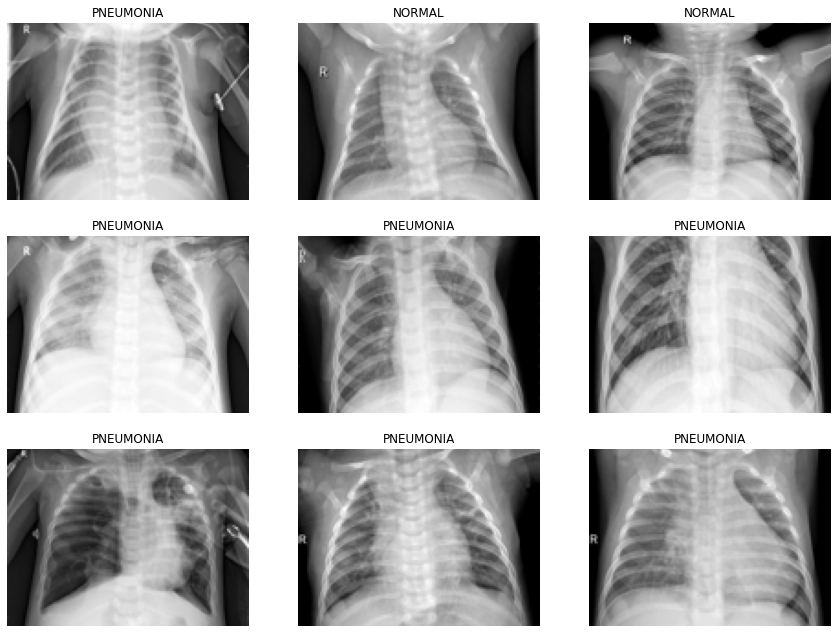

In [14]:
fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(4, 4)
#
for line in range(0, 3):
    for row in range(0, 3):
        num_image = random.randint(0, data_array.shape[0])
        ax = fig.add_subplot(gs[line, row])
        ax.axis('off');
        ax.set_title(target[num_image])
        ax.imshow(data_array[num_image]);

In [15]:
#Train test split
#We separate dataset into two sets, one for training and another one for testing and evaluate model.
#The test set consists in 20% of the dataset and the remaining is for the train set. 
#The class repartition is kept by setting the parameter stratify to target.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data_array, np.array(target), random_state=43, test_size=0.2, stratify=target)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4684, 97, 132)
(1172, 97, 132)
(4684,)
(1172,)


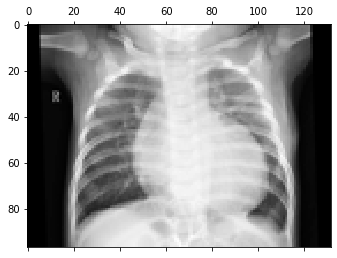

In [18]:
plt.matshow(X_test[0])

In [ ]:
y_test[1]

In [ ]:
pd.DataFrame(y_train).value_counts()

In [ ]:
len(y_train)

In [ ]:
pd.DataFrame(y_train).value_counts()/len(y_train)

In [ ]:
pd.DataFrame(y_test).value_counts()/len(y_test)

In [ ]:
#Preparing the data
#o ease the convergence of the algorithm, it is usefull to normalize the data.
#See here what are the maximum and minimum values in the data, and normalize it accordingly (the resulting image intensities should be between 0 and 1).

In [ ]:
print(X_train.max())
print(X_train.min())

In [ ]:
X_test_norm = np.round((X_test/255), 3).copy()
X_train_norm = np.round((X_train/255), 3).copy()

In [ ]:
print(X_train_norm.max())
print(X_train_norm.min())

In [ ]:
#Here again, we can check the normalised pictures randomly

In [ ]:
fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(4, 4)
#
for line in range(0, 3):
    for row in range(0, 3):
        num_image = random.randint(0, X_train_norm.shape[0])
        ax = fig.add_subplot(gs[line, row])
       # ax.axis('off');
        ax.set_title(y_train[num_image])
        ax.imshow(X_train_norm[num_image]);

In [ ]:
#Target encoding
#Here we convert targets from string to numerical values, 
#each category becoming an integer - 0 or 1 - for NORMAL or PNEUMONIA:

In [ ]:
display(np.array(y_train).shape)
display(np.unique(y_train))
display(np.array(y_test).shape)
display(np.unique(y_test))

In [ ]:
#Fitting the encoder on train set:

encoder = LabelEncoder().fit(y_train)


In [ ]:
#Applying on train, test and validation sets:

y_train_cat = encoder.transform(y_train)
y_test_cat = encoder.transform(y_test)

In [ ]:
y_train_cat

In [ ]:
y_test_cat[0]

In [ ]:
#Expanding dimension for the correct model intput dim
#The deep learning model needs a 4 dimensions tensor to work with. Here we have grayscale pictures with no channel. 
#It means the matrices of our black and white pictures are of shape 3. 
#We need to add an extra dimension so algorithm can accept it.

In [ ]:
X_train_norm.shape

In [ ]:
X_train_norm = X_train_norm.reshape(-1, 97, 132, 1)
X_test_norm = X_test_norm.reshape(-1, 97, 132, 1)
X_train_norm.shape

In [ ]:
X_test_norm.shape

In [ ]:
Convolutionnal neural network
Now, let's define the Convolutional Neural Network.

The CNN that is composed of:

◼️ Conv2D layer with 32 filters, a kernel size of (3, 3), the relu activation function, a padding equal to same and the correct input_shape
◼️ MaxPooling2D layer with a pool size of (2, 2)
◼️ Conv2D layer with 64 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to same
◼️ MaxPooling2D layer with a pool size of (2, 2)
◼️ Conv2D layer with 128 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to same
◼️ MaxPooling2D layer with a pool size of (3, 3)
◼️ Flatten layer
◼️ dense function with 120 neurons with the relu activation function
◼️ dense function with 60 neurons with the relu activation function
◼️ dropout layer (with a rate of 0.5), to regularize the network
◼️ dense function related to the task: binary classification > sigmoid

In [ ]:
def initialize_model():
    model = Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(im_height, im_width, 1), padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation="relu", padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation="relu", padding='same'))
    model.add(layers.MaxPool2D(pool_size=(3, 3)))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(60, activation='relu'))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [ ]:
model = initialize_model()
model.summary()

In [ ]:
def compile_model(model):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
#Here I set an early stopping after 5 epochs and set the parameter restore_best_weights to True so that the weights of best score on monitored metric -
here val_accuracy (accuracy on test set) - are restored when training stops.
This way the model has the best accuracy possible on unseen data.

In [ ]:
model = initialize_model()
model = compile_model(model)
callback = [EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True),
            ReduceLROnPlateau(monitor = 'val_loss', patience = 1, factor=0.5, verbose=1)]

history = model.fit(X_train_norm, y_train_cat,
                    batch_size=8,
                    epochs=1000,
                    validation_split=0.3,
                    callbacks=callback)

In [ ]:
#Results & Evaluation

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(-0.1, 0.1)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.9, 1.1)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

plot_history(history, title='', axs=None, exp_name="");

In [ ]:
predictions = model.predict(X_test_norm)

In [ ]:
m = Accuracy()
m.update_state(y_test_cat, np.round(predictions))
m.result().numpy()

In [ ]:
model.evaluate(X_test_norm, y_test_cat)

In [ ]:
model.predict(X_test_norm)[0]

In [ ]:
categories[int(np.round(model.predict(X_test_norm)[0]))]

In [ ]:
y_test_cat[0]

In [ ]:
cm = confusion_matrix(y_test_cat, np.round(predictions))
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylabel("True", color="royalblue", fontsize=35, fontweight=700)
ax.set_xlabel("Prediction", color="royalblue", fontsize=35, fontweight=700)
plt.yticks(rotation=0);

In [ ]:
acc = (831 + 285) / (831 + 285 + 24 + 32)
acc

In [3]:
#o we have an accuracy on unseen data of 97%.
Let's plot some random chest-x-ray picture alongside with true label and predicted label to check everything is ok:

SyntaxError: EOL while scanning string literal (4290221256.py, line 2)

In [4]:
fig = plt.figure(figsize=(20,25))
gs = fig.add_gridspec(8, 4)
#
for row in range(0, 8):
    for col in range(0, 3):
        num_image = random.randint(0, X_test_norm.shape[0])
        ax = fig.add_subplot(gs[row, col])
        ax.axis('off');
        ax.set_title("Predicted: " + categories[int(np.round(predictions)[num_image][0])] + " /\n True value: " + categories[y_test_cat[num_image]])
        ax.imshow(X_test_norm[num_image]);
fig.suptitle("Predicted label VS True label \n for the displayed chest X Ray pictures", fontsize=25, x=0.42);
#plt.tight_layout;

NameError: name 'plt' is not defined

In [5]:
X_test_norm[6].shape

NameError: name 'X_test_norm' is not defined

In [6]:
X_test_norm[6]

NameError: name 'X_test_norm' is not defined

In [7]:
y_test_cat[6]

NameError: name 'y_test_cat' is not defined

In [8]:
predictions = model.predict(X_test_norm)

NameError: name 'model' is not defined

In [9]:
predictions[6]

NameError: name 'predictions' is not defined

In [45]:
from keras.models import load_model


In [3]:
model.save('model_pneumonia.hdf5')

NameError: name 'model' is not defined

In [46]:
model = load_model('model_pneumonia.hdf5')

In [47]:
loss, accuracy = model.evaluate(X_test_norm, y_test_cat)

37/37 [==============================] - 17s 355ms/step - loss: 0.1405 - accuracy: 0.9522


In [48]:
int(np.round(model.predict(X_test_norm)[0]))

1

In [50]:
categorries = {0:"NORMAL", 1:"PNEUMONIA"}

In [51]:
categorries[int(np.round(model.predict(X_test_norm)[0]))]

'PNEUMONIA'

In [52]:
X_test_norm[7].shape

(97, 132, 1)

In [53]:
import cv2

In [228]:
def classify_image(file_path):
    __model = model
    result = []
    if(type(file_path) == type(None)):
        pass
    else:
        print(file_path)
        imgs = cv2.imread(file_path)
        #imgs= cv2.cvtColor(imgs, cv2.COLOR_BGR2GRAY)
        #print(imgs)
        #print(imgs.shape)
        try:
            final = cv2.resize(imgs, (132,97))
            print(np.shape(final))
            final_norm = np.round((final / 255), 3).copy()
            print(final_norm)
            print(np.shape(final_norm))
            #final_norm = np.reshape(final_norm,( -1, 197, 132))
            final_norm = final_norm.reshape( -1,97, 132,1)
            #print(np.shape(final_norm))
            pred = __model.predict(final_norm)
            print(pred)
        
            #result.append({
              #    'class': class_number_to_name(tuple(np.round(__model.predict(final_norm)))),
                 #   'class_probability': np.around(__model.predict(final_norm)*100,2).tolist()[0],
                 #   'class_dictionary': __class_name_to_number
               # })
        except cv2.error as e:
            print("invalid frame!")

In [229]:
print(classify_image("C:/Users/TOBY CYBERWORLD/Desktop/DeepLearning/PneumomiaClassifier/server/test_images/IM-0135-0001.jpeg"))

C:/Users/TOBY CYBERWORLD/Desktop/DeepLearning/PneumomiaClassifier/server/test_images/IM-0135-0001.jpeg
(97, 132, 3)
[[[0.435 0.435 0.435]
  [0.439 0.439 0.439]
  [0.439 0.439 0.439]
  ...
  [0.047 0.047 0.047]
  [0.063 0.063 0.063]
  [0.078 0.078 0.078]]

 [[0.427 0.427 0.427]
  [0.439 0.439 0.439]
  [0.439 0.439 0.439]
  ...
  [0.141 0.141 0.141]
  [0.161 0.161 0.161]
  [0.173 0.173 0.173]]

 [[0.435 0.435 0.435]
  [0.408 0.408 0.408]
  [0.435 0.435 0.435]
  ...
  [0.235 0.235 0.235]
  [0.216 0.216 0.216]
  [0.239 0.239 0.239]]

 ...

 [[0.    0.    0.   ]
  [0.    0.    0.   ]
  [0.    0.    0.   ]
  ...
  [0.    0.    0.   ]
  [0.    0.    0.   ]
  [0.    0.    0.   ]]

 [[0.    0.    0.   ]
  [0.    0.    0.   ]
  [0.    0.    0.   ]
  ...
  [0.    0.    0.   ]
  [0.    0.    0.   ]
  [0.    0.    0.   ]]

 [[0.    0.    0.   ]
  [0.    0.    0.   ]
  [0.    0.    0.   ]
  ...
  [0.    0.    0.   ]
  [0.    0.    0.   ]
  [0.    0.    0.   ]]]
(97, 132, 3)
[[1.       ]
 [0.9999993]

In [169]:
y_test_cat[43]

1

In [91]:
predictions[43]

array([1.], dtype=float32)

In [86]:
X_test_norm[43].shape

(97, 132, 1)